In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

### Loading data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DL/data.csv")
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


### Checking number of rows and columns

In [ ]:
df.shape

(50553, 12)

### Checking the Non-Null Count and Dtype for each columns to identify if columns have null or undesired value. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    50553 non-null  int64  
 1   Agency                50553 non-null  object 
 2   Agency Type           50553 non-null  object 
 3   Distribution Channel  50553 non-null  object 
 4   Product Name          50553 non-null  object 
 5   Claim                 50553 non-null  int64  
 6   Duration              50553 non-null  int64  
 7   Destination           50553 non-null  object 
 8   Net Sales             50553 non-null  float64
 9   Commision (in value)  50553 non-null  float64
 10  Gender                14600 non-null  object 
 11  Age                   50553 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


### The Gender column have null or undesired value so calling unique function to see different categories the Gender column contains.

In [ ]:
df['Gender'].unique()

array([nan, 'F', 'M'], dtype=object)

### Replacing nan with undisclosed.

In [ ]:
df['Gender'].replace(np.nan,'undisclose',inplace=True)

### So now the Gender column have three categories that are male,female and undisclose.

In [ ]:
df['Gender'].unique()

array(['undisclose', 'F', 'M'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    50553 non-null  int64  
 1   Agency                50553 non-null  object 
 2   Agency Type           50553 non-null  object 
 3   Distribution Channel  50553 non-null  object 
 4   Product Name          50553 non-null  object 
 5   Claim                 50553 non-null  int64  
 6   Duration              50553 non-null  int64  
 7   Destination           50553 non-null  object 
 8   Net Sales             50553 non-null  float64
 9   Commision (in value)  50553 non-null  float64
 10  Gender                50553 non-null  object 
 11  Age                   50553 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


### Calling describe function to analyse, which numerical columns have outliers.

In [ ]:
df.describe()

,ID,Claim,Duration,Net Sales,Commision (in value),Age
count,50553.000000,50553.000000,50553.000000,50553.000000,50553.00000,50553.000000
mean,31679.740134,0.014658,49.425969,40.800977,9.83809,40.011236
std,18288.265350,0.120180,101.434647,48.899683,19.91004,14.076566
min,0.000000,0.000000,-2.000000,-389.000000,0.00000,0.000000
25%,15891.000000,0.000000,9.000000,18.000000,0.00000,35.000000
50%,31657.000000,0.000000,22.000000,26.500000,0.00000,36.000000
75%,47547.000000,0.000000,53.000000,48.000000,11.55000,44.000000
max,63325.000000,1.000000,4881.000000,810.000000,283.50000,118.000000


### Dropping ID,Gender and Claim.Dropping ID,Gender because these columns can't be considered as a deciding parameter and dropping Claim column from the features set because it is the target.

### Splitting the data into feature and target.

In [ ]:
X=df.drop(['ID','Gender',"Claim"],axis=1)
y=df['Claim']

### plotting a boxplot for numerical columns for visalization of outliers.

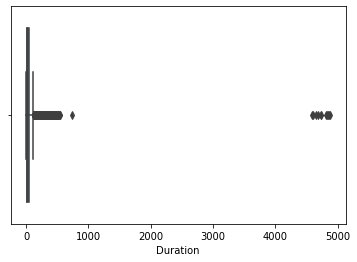

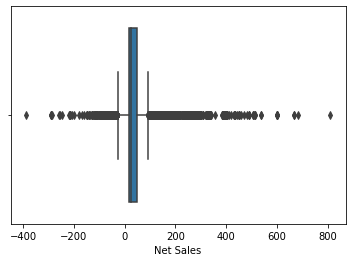

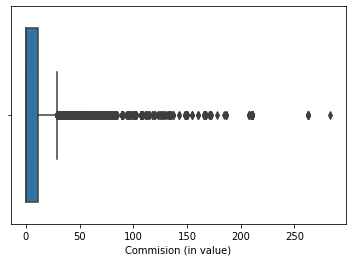

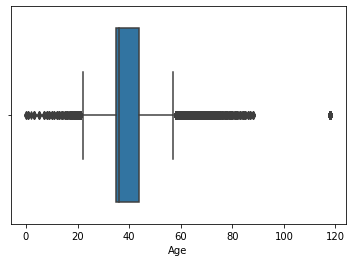

In [ ]:
for i in df.describe():
  if df[i] is df['Claim']:
    continue
  if df[i] is df['ID']:
    continue

  plt.figure()
  sns.boxplot(df[i])
  plt.show()

### plotting a boxplot b/w numerical columns and target(Claim) for visalization of outliers w.r.t the target column(Claim).

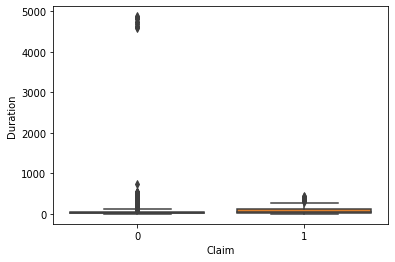

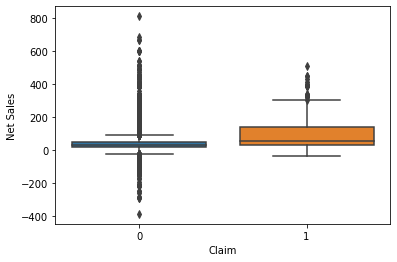

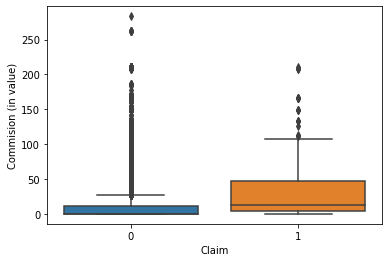

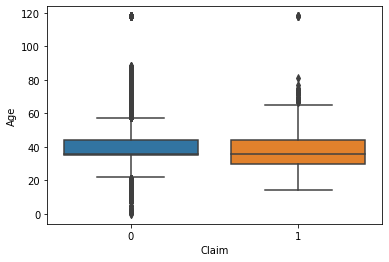

In [ ]:
for i in df.describe():
  if df[i] is df['Claim']:
    continue
  if df[i] is df['ID']:
    continue

  plt.figure()
  sns.boxplot(data=df,y=df[i],x=df['Claim'])
  plt.show()

### Removing outliers

In [ ]:
outliers=['Duration','Net Sales','Commision (in value)','Age']

for col in outliers:
  for i in df['Claim'].unique():
    claimornot=df[df['Claim']==i][col]
    q1=np.quantile(claimornot,0.25)
    q3=np.quantile(claimornot,0.75)
    iqr=q3-q1
    uw=q3+1.5*iqr
    lw=q1-1.5*iqr

    index1=claimornot[claimornot>uw].index
    if len(index1)!=0:
      df.drop(index1,inplace=True)

    index2=claimornot[claimornot<lw].index
    if len(index2)!=0:
      df.drop(index2,inplace=True)

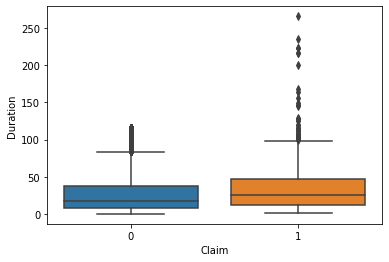

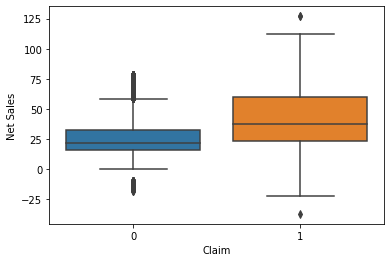

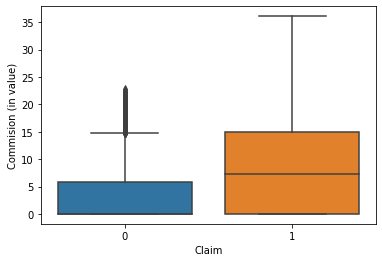

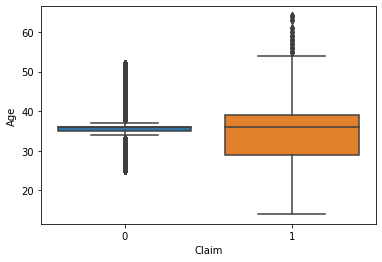

In [ ]:
for i in df.describe():
  if df[i] is df['Claim']:
    continue
  if df[i] is df['ID']:
    continue

  plt.figure()
  sns.boxplot(data=df,y=df[i],x=df['Claim'])
  plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32322 entries, 0 to 50551
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    32322 non-null  int64  
 1   Agency                32322 non-null  object 
 2   Agency Type           32322 non-null  object 
 3   Distribution Channel  32322 non-null  object 
 4   Product Name          32322 non-null  object 
 5   Claim                 32322 non-null  int64  
 6   Duration              32322 non-null  int64  
 7   Destination           32322 non-null  object 
 8   Net Sales             32322 non-null  float64
 9   Commision (in value)  32322 non-null  float64
 10  Gender                32322 non-null  object 
 11  Age                   32322 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 4.5+ MB


### Analysing the categorical columns

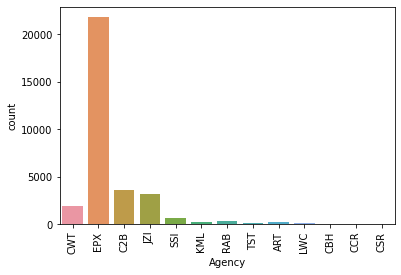

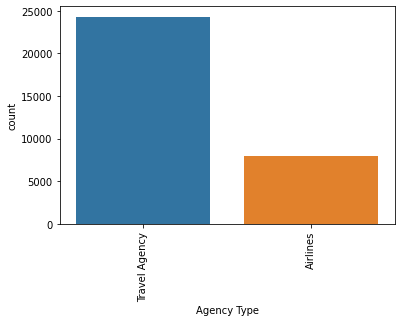

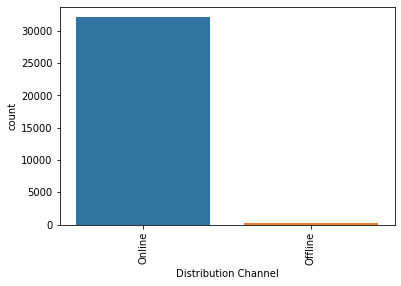

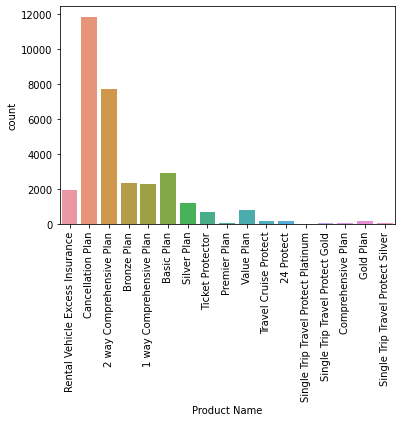

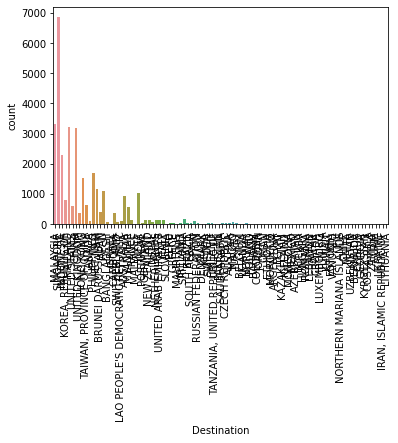

In [ ]:
for i in ['Agency','Agency Type','Distribution Channel','Product Name','Destination']:
  plt.figure()
  sns.countplot(df[i])
  plt.xticks(rotation=90)
  plt.show()

### Analysing the target column to see if dataset is balanced or imbalance.

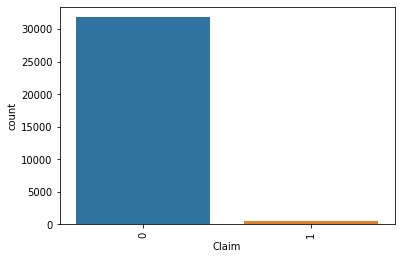

In [ ]:
plt.figure()
sns.countplot(df['Claim'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Claim'].value_counts()

0    31831
1      491
Name: Claim, dtype: int64

### splitting the data into train and test

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=1)

### using random oversampling to balance the dataset.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=1)
X_train_ros, y_train_ros = ros.fit_resample(X_train,y_train)

In [ ]:
y_train_ros.value_counts()

1    44834
0    44834
Name: Claim, dtype: int64

### Encoding the categorical columns using label encoder.

In [ ]:
for i in ['Agency','Agency Type','Distribution Channel','Product Name','Destination']:
  le=LabelEncoder()
  X_train_ros[i]=le.fit_transform(X_train_ros[i])
  X_test[i]=le.transform(X_test[i])

### Scaling the numerical columns using the standard scaler.


In [ ]:
for i in ['Duration','Net Sales','Commision (in value)','Age']:
  ss=StandardScaler()
  X_train_ros[i]=ss.fit_transform(X_train_ros[[i]])
  X_test[i]=ss.transform(X_test[[i]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

In [ ]:
X_train_ros.shape

(89668, 9)

In [ ]:
from tensorflow.keras.layers import LeakyReLU

### forming neural network with 10 hidden layers and 1 output layer.

In [ ]:
model = Sequential()

model.add(Dense(1024,activation=LeakyReLU(alpha=0.5),input_dim=9))

model.add(BatchNormalization())
model.add(Dense(512,activation=LeakyReLU(alpha=0.5)))

model.add(BatchNormalization())
model.add(Dense(256,activation=LeakyReLU(alpha=0.5)))

model.add(BatchNormalization())
model.add(Dense(128,activation=LeakyReLU(alpha=0.5)))

model.add(BatchNormalization())
model.add(Dense(64,activation=LeakyReLU(alpha=0.5)))

model.add(BatchNormalization())
model.add(Dense(32,activation=LeakyReLU(alpha=0.5)))

model.add(BatchNormalization())
model.add(Dense(16,activation=LeakyReLU(alpha=0.5)))

model.add(BatchNormalization())
model.add(Dense(8,activation=LeakyReLU(alpha=0.5)))

model.add(BatchNormalization())
model.add(Dense(4,activation=LeakyReLU(alpha=0.5)))

model.add(BatchNormalization())
model.add(Dense(2,activation=LeakyReLU(alpha=0.7)))

model.add(BatchNormalization())
model.add(Dense(1, activation="sigmoid"))

In [ ]:
from tensorflow.keras.optimizers import Nadam

### using optimizer as adagrad and loss function as binary cross entropy

In [ ]:
model.compile(optimizer='adagrad', loss="binary_crossentropy")

### using EarlyStopping to monitor loss function 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(monitor="loss", min_delta=0.01, patience=5)

### Training the ANN with batch size=100 and epochs=30

In [ ]:
model.fit(X_train_ros,y_train_ros, batch_size=100, epochs=30, callbacks=[early_stopping])

Epoch 1/30
897/897 [==============================] - 11s 10ms/step - loss: 0.5541
Epoch 2/30
897/897 [==============================] - 9s 10ms/step - loss: 0.5329
Epoch 3/30
897/897 [==============================] - 9s 9ms/step - loss: 0.5217
Epoch 4/30
897/897 [==============================] - 9s 10ms/step - loss: 0.5125
Epoch 5/30
897/897 [==============================] - 9s 10ms/step - loss: 0.5062
Epoch 6/30
897/897 [==============================] - 9s 9ms/step - loss: 0.4999
Epoch 7/30
897/897 [==============================] - 9s 10ms/step - loss: 0.4953
Epoch 8/30
897/897 [==============================] - 9s 10ms/step - loss: 0.4912
Epoch 9/30
897/897 [==============================] - 8s 9ms/step - loss: 0.4868
Epoch 10/30
897/897 [==============================] - 8s 9ms/step - loss: 0.4833
Epoch 11/30
897/897 [==============================] - 8s 9ms/step - loss: 0.4796
Epoch 12/30
897/897 [==============================] - 8s 9ms/step - loss: 0.4767
Epoch 13/30
897/89

### Testing with the test data 

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

### Evaluating the ANN model

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      4978
           1       0.05      0.62      0.09        78

    accuracy                           0.81      5056
   macro avg       0.52      0.71      0.49      5056
weighted avg       0.98      0.81      0.88      5056



### Thus the above Artificial Neural Network (ANN) model is able to predict whether to approve the insurance or not with an accuracy of 81% and recall of 62%.